## Feature Scaling

#### There are two primary ways for feature scaling which we will cover in the remainder of this article:

    Rescaling, or min-max normalization: we scale the data into one of two ranges: [0,1] or [a,b], often [−1,1].
    Standardization, or Z-score normalization: we scale the data so that the mean is zero and variance is 1.

### ***Rescaling (min-max normalization)***

Rescaling, or min-max normalization, is a simple method for bringing your data into one out of two ranges: [0,1] or [a,b]. It highly involves the minimum and maximum values from the dataset in normalizing the data.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = np.array([1.0, 12.4, 3.9, 10.4])

#### For [0,2]

In [3]:
normalize_Data=(data-np.min(data))/(np.max(data) - np.min(data))
normalize_Data

array([0.        , 1.        , 0.25438596, 0.8245614 ])

#### For [a, b]

If instead we wanted to scale it to some other arbitrary range – say [0,1.5], we can apply min-max normalization but then for the [a,b] range, where a and b can be chosen yourself.

We can use the following formula for normalization:

In [4]:
a = 0
b = 1.5

normalize_Data = a + ((data - np.min(data)) * (b - a) / (np.max(data) - np.min(data)))
print(normalize_Data)

[0.         1.5        0.38157895 1.23684211]


#### Applying the MinMaxScaler from Scikit-learn

In [5]:

from sklearn.preprocessing import MinMaxScaler
dataset = np.array([1.0, 12.4, 3.9, 10.4]).reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1.5))
scaler.fit(dataset)
normalized_dataset = scaler.transform(dataset)
print(normalized_dataset)

[[0.        ]
 [1.5       ]
 [0.38157895]
 [1.23684211]]


### Standardization (Z-scale normalization)

we normalized our dataset based on the minimum and maximum values. Mean and standard deviation are however not standard, meaning that the mean is zero and that the standard deviation is one.

The formula for standardization is as follows:

standardized_dataset = (dataset - mean(dataset)) / standard_deviation(dataset)

we subtract the mean and divide by the standard deviation. By removing the mean from each sample, we effectively move the samples towards a mean of 0 (after all, we removed it from all samples). In addition, by dividing by the standard deviation, we yield a dataset where the values describe by how much of the standard deviation they are offset from the mean.

In [6]:
data = np.array([1.0, 2.0, 3.0, 3.0, 3.0, 2.0, 1.0])
standardized_data= (data - np.average(data)) / (np.std(data))
print(standardized_data)
print(np.mean(data))
print(np.mean(standardized_data))

[-1.37198868 -0.17149859  1.02899151  1.02899151  1.02899151 -0.17149859
 -1.37198868]
2.142857142857143
3.172065784643304e-17


In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler
dataset = np.array([1.0, 2.0, 3.0, 3.0, 3.0, 2.0, 1.0]).reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(dataset)
standardized_dataset = scaler.transform(dataset)
print(standardized_dataset)
print(np.mean(standardized_dataset))
print(np.std(standardized_dataset))

[[-1.37198868]
 [-0.17149859]
 [ 1.02899151]
 [ 1.02899151]
 [ 1.02899151]
 [-0.17149859]
 [-1.37198868]]
3.172065784643304e-17
1.0


We see that the mean is really close to 0 (3.17×10−17) and that standard deviation is one.

### use min-max normalization if you want to normalize the data while keeping some differences in scales (because units remain different), and use standardization if you want to make scales comparable (through standard deviations).

In [8]:
import seaborn as sns

In [9]:
df=sns.load_dataset("iris")

<AxesSubplot:>

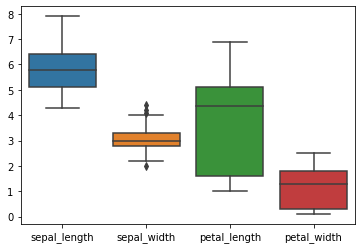

In [10]:
sns.boxplot(data=df)

In [11]:
df=df.drop(columns=["species"])

In [12]:
scaler=MinMaxScaler()

In [13]:
norm_data=scaler.fit_transform(df)

<AxesSubplot:>

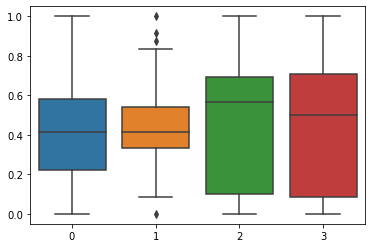

In [14]:
sns.boxplot(data=norm_data)

In [17]:
df=pd.read_csv("../Data/Bodyfat.csv")

In [18]:
scale_data=scaler.fit_transform(df)

In [19]:
scale_data

array([[0.66549605, 0.25894737, 0.01694915, ..., 0.35643564, 0.46043165,
        0.23214286],
       [0.7928007 , 0.12842105, 0.        , ..., 0.28217822, 0.56834532,
        0.42857143],
       [0.40737489, 0.53263158, 0.        , ..., 0.1980198 , 0.30215827,
        0.14285714],
       ...,
       [0.33187006, 0.61684211, 0.84745763, ..., 0.32178218, 0.44604317,
        0.39285714],
       [0.39420544, 0.54736842, 0.84745763, ..., 0.28217822, 0.60431655,
        0.71428571],
       [0.28182616, 0.67157895, 0.88135593, ..., 0.44059406, 0.64748201,
        0.91071429]])

In [20]:
new_df=pd.DataFrame(scale_data)

In [21]:
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.665496,0.258947,0.016949,0.146127,0.792746,0.253731,0.242531,0.200762,0.151515,0.294264,0.267081,0.189189,0.356436,0.460432,0.232143
1,0.792801,0.128421,0.000000,0.223789,0.886010,0.368159,0.251318,0.172808,0.218501,0.286783,0.267081,0.290541,0.282178,0.568345,0.428571
2,0.407375,0.532632,0.000000,0.145105,0.761658,0.144279,0.289982,0.235070,0.226475,0.309227,0.366460,0.331081,0.198020,0.302158,0.142857
3,0.703248,0.218947,0.067797,0.270795,0.886010,0.313433,0.395431,0.216010,0.258373,0.321696,0.267081,0.250000,0.376238,0.604317,0.428571
4,0.342406,0.604211,0.033898,0.268751,0.865285,0.164179,0.316344,0.388818,0.269537,0.399002,0.571429,0.331081,0.366337,0.482014,0.339286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.690079,0.231579,0.813559,0.064378,0.777202,0.189055,0.173989,0.180432,0.060606,0.059850,0.111801,0.162162,0.039604,0.338129,0.482143
248,0.251097,0.707368,0.847458,0.337216,0.834197,0.487562,0.513181,0.452351,0.311005,0.309227,0.484472,0.277027,0.514851,0.546763,0.767857
249,0.331870,0.616842,0.847458,0.278970,0.756477,0.388060,0.558875,0.534943,0.266348,0.326683,0.267081,0.162162,0.321782,0.446043,0.392857
250,0.394205,0.547368,0.847458,0.295320,0.849741,0.388060,0.509666,0.405337,0.204147,0.219451,0.534161,0.243243,0.282178,0.604317,0.714286


In [22]:
new_df=pd.DataFrame(scale_data,columns=df.columns)

In [23]:
new_df

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.665496,0.258947,0.016949,0.146127,0.792746,0.253731,0.242531,0.200762,0.151515,0.294264,0.267081,0.189189,0.356436,0.460432,0.232143
1,0.792801,0.128421,0.000000,0.223789,0.886010,0.368159,0.251318,0.172808,0.218501,0.286783,0.267081,0.290541,0.282178,0.568345,0.428571
2,0.407375,0.532632,0.000000,0.145105,0.761658,0.144279,0.289982,0.235070,0.226475,0.309227,0.366460,0.331081,0.198020,0.302158,0.142857
3,0.703248,0.218947,0.067797,0.270795,0.886010,0.313433,0.395431,0.216010,0.258373,0.321696,0.267081,0.250000,0.376238,0.604317,0.428571
4,0.342406,0.604211,0.033898,0.268751,0.865285,0.164179,0.316344,0.388818,0.269537,0.399002,0.571429,0.331081,0.366337,0.482014,0.339286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.690079,0.231579,0.813559,0.064378,0.777202,0.189055,0.173989,0.180432,0.060606,0.059850,0.111801,0.162162,0.039604,0.338129,0.482143
248,0.251097,0.707368,0.847458,0.337216,0.834197,0.487562,0.513181,0.452351,0.311005,0.309227,0.484472,0.277027,0.514851,0.546763,0.767857
249,0.331870,0.616842,0.847458,0.278970,0.756477,0.388060,0.558875,0.534943,0.266348,0.326683,0.267081,0.162162,0.321782,0.446043,0.392857
250,0.394205,0.547368,0.847458,0.295320,0.849741,0.388060,0.509666,0.405337,0.204147,0.219451,0.534161,0.243243,0.282178,0.604317,0.714286


In [24]:
scaler=StandardScaler()

In [25]:
scale_data=scaler.fit_transform(df)

In [28]:
new_df=pd.DataFrame(scale_data,columns=df.columns)
new_df

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.801647,-0.820246,-1.740073,-0.841246,-0.656205,-0.738665,-0.918048,-0.683533,-0.755929,-0.077479,-0.536131,-0.710826,-0.090676,-0.626718,-1.212541
1,1.565061,-1.562573,-1.819583,-0.193462,0.574790,0.209365,-0.858621,-0.887963,-0.168502,-0.134736,-0.536131,0.175947,-0.588143,0.117079,-0.031943
2,-0.746240,0.736245,-1.819583,-0.849769,-1.066536,-1.645475,-0.597144,-0.432643,-0.098570,0.037035,0.128592,0.530656,-1.151940,-1.717621,-1.749177
3,1.028039,-1.047733,-1.501543,0.198617,0.574790,-0.244041,0.115976,-0.572026,0.181157,0.132464,-0.536131,-0.178762,0.041982,0.365012,-0.031943
4,-1.135844,1.143327,-1.660563,0.181570,0.301235,-1.480601,-0.418864,0.691719,0.279061,0.724121,1.499585,0.530656,-0.024347,-0.477959,-0.568578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.949065,-0.975895,1.996904,-1.523123,-0.861370,-1.274507,-1.381576,-0.832209,-1.553151,-1.871535,-1.574763,-0.947298,-2.213203,-1.469689,0.290039
248,-1.683396,1.730005,2.155924,0.752642,-0.109096,1.198613,0.912294,1.156332,0.642706,0.037035,0.917952,0.057711,0.970588,-0.031680,2.007273
249,-1.199023,1.215165,2.155924,0.266805,-1.134925,0.374239,1.221312,1.760328,0.251088,0.170635,-0.536131,-0.947298,-0.322827,-0.725891,-0.246597
250,-0.825214,0.820056,2.155924,0.403180,0.096070,0.374239,0.888523,0.812518,-0.294379,-0.650050,1.250314,-0.237880,-0.588143,0.365012,1.685292
